In [5]:
from mc import sample_data, run_model, plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from resnet import ResNet
from balanced_resnet import BalancedResNet

In [8]:
N = 10000
n = 100
d = 10
n_in = 10
n_out = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X = torch.ones((N, n_in)) / np.sqrt(n_in)
y = torch.zeros((N, 10))

X = X.to(device)
y = y.to(device)
with torch.no_grad():
    for i in range(N):
        model = ResNet(n_in, n_out, n, d)
        model = model.to(device)
        y[i] = model(X[i])
y = torch.log(torch.norm(y, dim=1)**2)

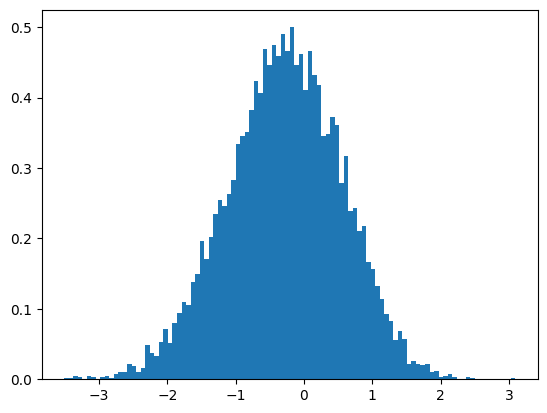

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
y = y.cpu().numpy()
ax.hist(y, bins=100, density=True)
plt.show()